## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 15
---------------------------------------

GOALS:

1. Practice making plots
2. Add trendlines to plots
3. Explore Linear Regression

----------------------------------------------------------

This homework has **4 questions** and **3 exercises**.


## Help with Algorithms!

Implementing algorithms can be very difficult. I would highly suggest that you **start by recreating the code that you see in the lecture**... copy and paste it and make sure it runs. THEN try to alter that code to do the exercises.

In [870]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [872]:
# Load the Data
file_location = 'https://joannabieri.com/introdatascience/data/paris-paintings.csv'
DF_raw_paintings = pd.read_csv(file_location,na_filter=False)

In [873]:
show(DF_raw_paintings)

In [876]:
# Make a copy of the data that we can start working on
DF = DF_raw_paintings.copy()

# Do something about all those different NaNs
DF.replace('',np.nan,inplace=True)
DF.replace('n/a',np.nan,inplace=True)
DF.replace('NaN',np.nan,inplace=True)
DF

,name,sale,lot,position,dealer,year,origin_author,origin_cat,school_pntg,diff_origin,...,peasant,othgenre,singlefig,portrait,still_life,discauth,history,allegory,pastorale,other
0,L1764-2,L1764,2,0.032787,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
1,L1764-3,L1764,3,0.049180,L,1764,I,O,I,1,...,0,1,0,0,0,0,0,0,0,0
2,L1764-4,L1764,4,0.065574,L,1764,X,O,D/FL,1,...,0,0,0,0,0,0,0,0,0,0
3,L1764-5a,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
4,L1764-5b,L1764,5,0.081967,L,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3388,R1764-498,R1764,498,0.992032,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3389,R1764-499,R1764,499,0.994024,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3390,R1764-500,R1764,500,0.996016,R,1764,F,O,F,1,...,0,0,0,0,0,0,0,0,0,0
3391,R1764-502a,R1764,502,1.000000,R,1764,F,O,F,1,...,0,0,1,0,0,0,0,0,0,0


In [878]:
DF.shape

(3393, 61)

In [880]:
DF.keys()

Index(['name', 'sale', 'lot', 'position', 'dealer', 'year', 'origin_author',
       'origin_cat', 'school_pntg', 'diff_origin', 'logprice', 'price',
       'count', 'subject', 'authorstandard', 'artistliving', 'authorstyle',
       'author', 'winningbidder', 'winningbiddertype', 'endbuyer', 'Interm',
       'type_intermed', 'Height_in', 'Width_in', 'Surface_Rect', 'Diam_in',
       'Surface_Rnd', 'Shape', 'Surface', 'material', 'mat', 'materialCat',
       'quantity', 'nfigures', 'engraved', 'original', 'prevcoll', 'othartist',
       'paired', 'figures', 'finished', 'lrgfont', 'relig', 'landsALL',
       'lands_sc', 'lands_elem', 'lands_figs', 'lands_ment', 'arch', 'mytho',
       'peasant', 'othgenre', 'singlefig', 'portrait', 'still_life',
       'discauth', 'history', 'allegory', 'pastorale', 'other'],
      dtype='object')

**Q1** Make historgrams of the height and width of all the paintings in the data set. You should be able to recreate the plots from the lecture without looking at the code.

Don't forget to change the values into floats like we did in the lecture!

In [883]:
my_cols = ['Height_in', 'Width_in']
DF[my_cols].dtypes

Height_in    object
Width_in     object
dtype: object

In [885]:
DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))
DF[my_cols].dtypes

Height_in    float64
Width_in     float64
dtype: object

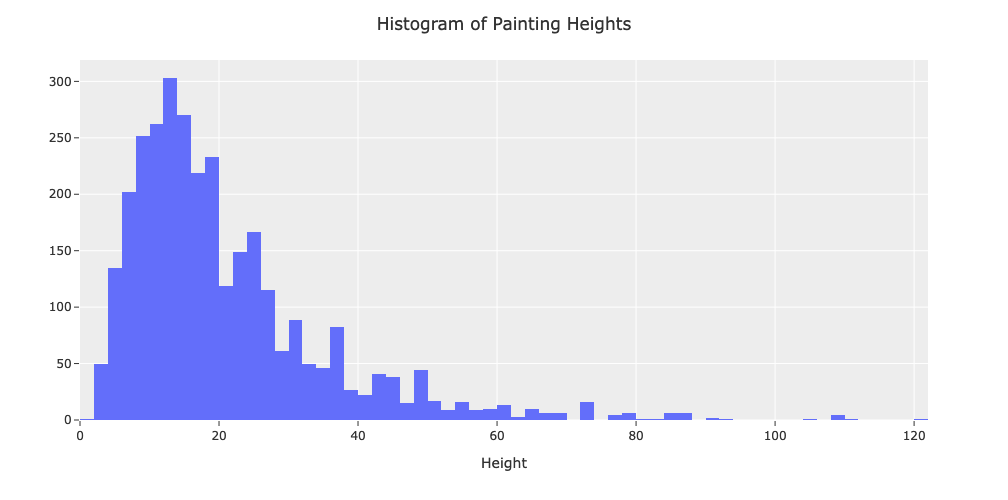

In [887]:
fig=px.histogram(DF,x='Height_in')
fig.update_layout(title='Histogram of Painting Heights',title_x=0.5,
                 xaxis_title='Height',yaxis_title='',
                 width=800,height=500,
                 template='ggplot2')
fig.show()

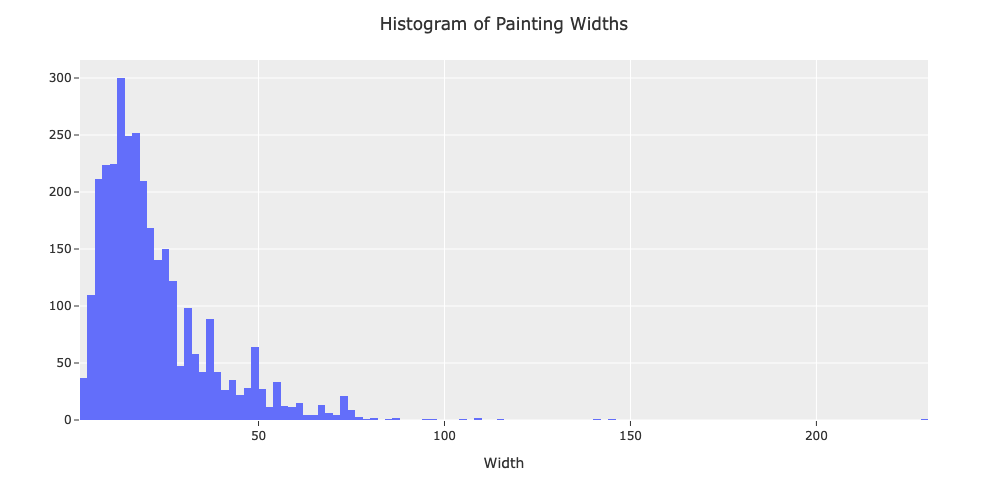

In [889]:
fig=px.histogram(DF,x='Width_in')
fig.update_layout(title='Histogram of Painting Widths',title_x=0.5,
                 xaxis_title='Width',yaxis_title='',
                 width=800,height=500,template='ggplot2')
fig.show()

**Q2** Explain in words what these plots tell you about the data.

The plots above tell me the measurements of Paris paintings. The histogram of the painting heights tells me that the majority of the paintings are short since most paintings are grouped together at 30 inches. Additionally, the histogram of the painting widths tells me that the majority of the paintings don't go above 50 inches.


**Q3** Make a scatter plot of the width vs the height like the one in the lecture. You should be able to recreate the plots here without looking at the code.

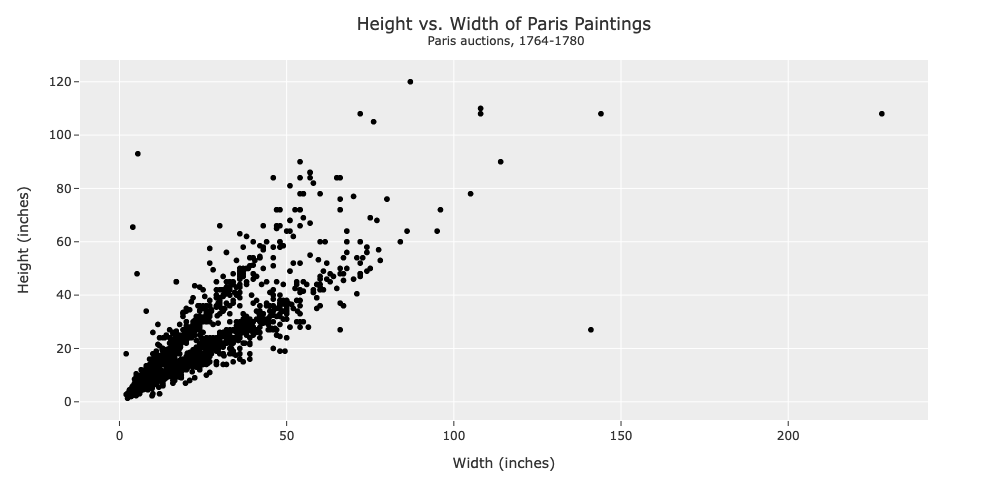

In [893]:
fig=px.scatter(DF,
              x='Width_in',y='Height_in',color_discrete_sequence=['black'])
fig.update_layout(title='Height vs. Width of Paris Paintings<br><sup> Paris auctions, 1764-1780</sup>',title_x=0.5,
                 xaxis_title='Width (inches)',yaxis_title='Height (inches)',
                 template='ggplot2',
                 height=500,width=800)
fig.show()

The plot below uses Ordinary Least Squares fitting to find a reasonable line.

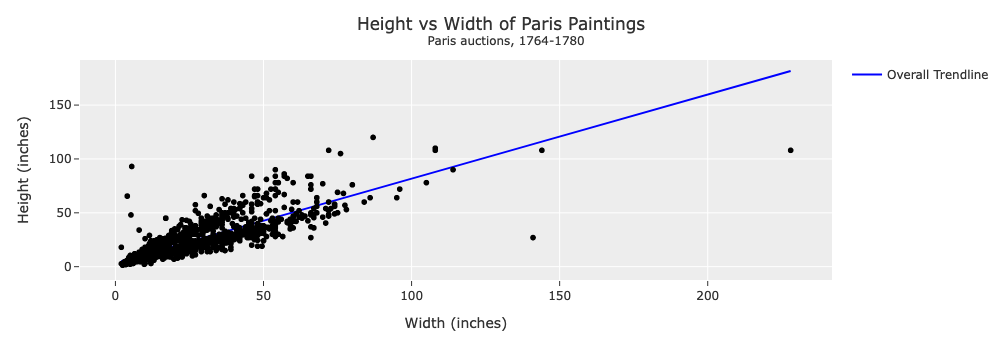

In [895]:
# Example Code Trendline

DF['Height_in'] = DF['Height_in'].apply(lambda x: float(x))
DF['Width_in'] = DF['Width_in'].apply(lambda x: float(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

In [897]:
results = px.get_trendline_results(fig)
info = results.iloc[0]["px_fit_results"].summary()
print(info)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6749.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:02:41   Log-Likelihood:                -11083.
No. Observations:                3135   AIC:                         2.217e+04
Df Residuals:                    3133   BIC:                         2.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6214      0.254     14.265      0.0

So the line that "fits" this data based on the code we ran is

$$ H = 0.7808 W + 3.6214 $$

**Q4** Where do we think this prediction is most accurate? Where is there the most error? Explain why you think this?

I believe that the predication above is the most accurate when the paintings are smaller in height and width and would have the most errors as the width and height increases. This is because, in most of the paintings, the larger widths usually have larger heights. However, there are outliers that have either a large width or large height, not both. 

**The four codes below are examples from the lecture notes.**

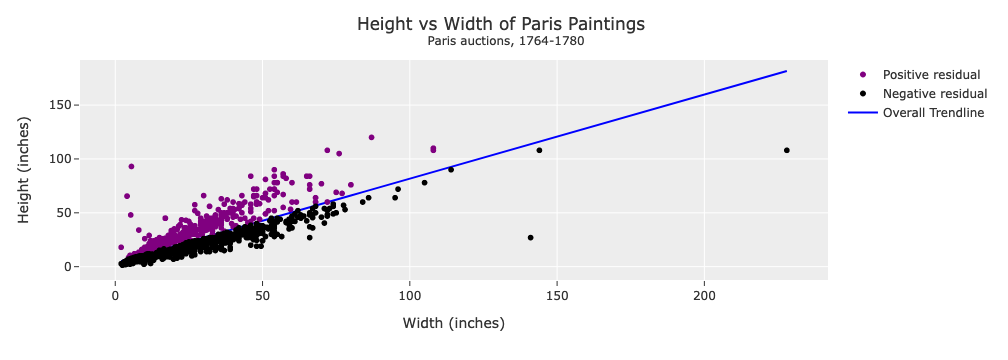

In [902]:
# Add some conditional coloring - advanced Python list comprehension
DF['residual_hw'] = ['Positive residual' if H > 0.7808*W + 3.6214 else 'Negative residual' for H,W in zip(DF['Height_in'],DF['Width_in']) ]


fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='residual_hw',
                 color_discrete_sequence=['purple','black'],
                trendline='ols',
                trendline_scope='overall',
                trendline_color_override='blue')


fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)",
                 legend_title = '')

fig.show()

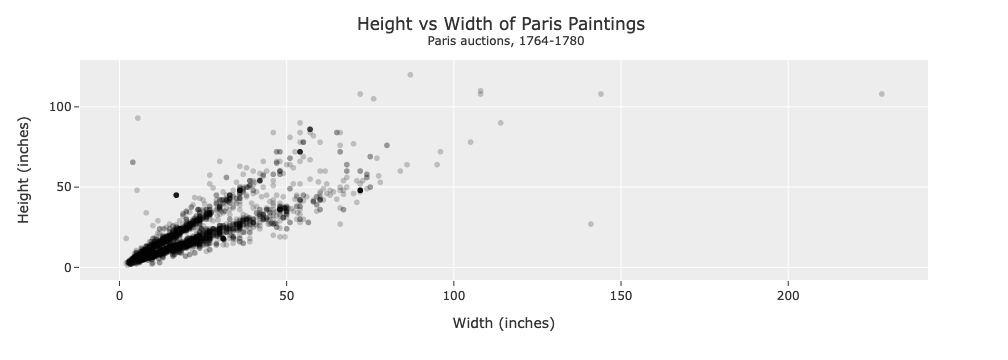

In [904]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

In [906]:
# Look at the landscape data
DF['landsALL'].value_counts().rename_axis('Landscape').reset_index(name='Counts')

,Landscape,Counts
0,0,2119
1,1,1274


In [908]:
# We want to think of this as categorical!
# 0 = not landscape, 1= landscape
# One way to do this is to turn the data into a string
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

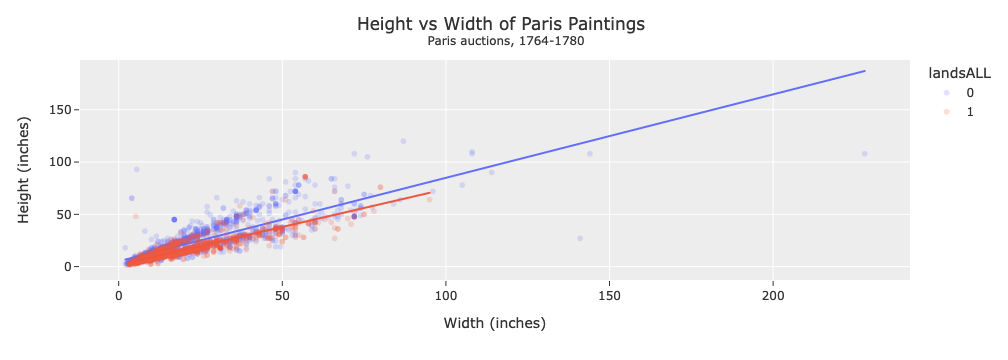

In [910]:
# Example Code Trendline with Categories
DF['landsALL'] = DF['landsALL'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='landsALL',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

IN the plot above we added another variable by coloring by whether or not there were landscape features in the painting. Then the trendline='ols' now gives us two lines. Here there is some evidence that if a painting in landscape, then it tends to be wider than it is tall.

**Exercise 1** Redo the plot above except color by some other variable that takes values of zero or one. Describe what the ols trendline tells you about the height and width of that type of painting. Eg. Does a painting being described as pastoral mean it is taller or wider than if it is not pastoral?

1. Choose a column that has just 0 and 1 as entries
2. Change those values into strings using apply and lambda
3. Do a value counts and talk about the balance in the data
4. Create a scatter plot with an old trendline colored by your focal column
5. Describe in words what you plot is telling you.

**Exercise 1** part 1

In [914]:
DF['peasant'].value_counts().rename_axis('Peasant').reset_index(name='Counts')

,Peasant,Counts
0,0,3181
1,1,212


**Exercise 1** part 2

In [917]:
DF['peasant'] = DF['peasant'].apply(lambda x: str(x))

**Exercise 1** part 3

In [920]:
DF['peasant'].value_counts()

peasant
0    3181
1     212
Name: count, dtype: int64

The balance in the 'value counts' code above displays how many paintings in the data set displayed a scene in which peasants were messing around. The number '0' means that the paintings didn't display such a scene, so there are 3181 paintings in the data frame that didn't contain this type of scene. However, the number '1' means that the paintings did contain such a scene, so there are 212 paintings in the data frame that do display peasants messing around. 

**Exercise 1** part 4

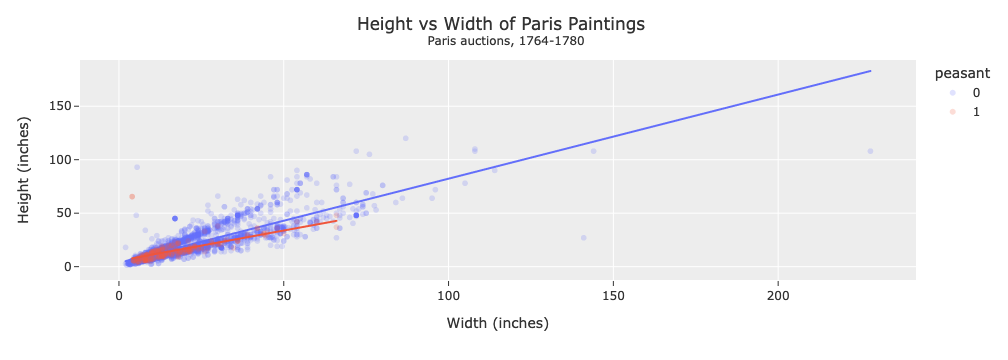

In [924]:
DF['peasant'] = DF['peasant'].apply(lambda x: str(x))

fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color='peasant',
                 opacity=0.2,
                 trendline='ols')

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

fig.show()

**Exercise 1** part 5

In the plot above I added another variable by coloring by whether or not there were scenes featuring peasants in the painting. Then the trendline='ols' now gives the plot two lines. The two lines are either blue or red, with blue signifing that there were no visible peasants in the painting and red being that there were. Therefore, the plot above proves that if a painting does contain a scene with peasants messing around, the painting would be wider than it would be tall.


## Install Scikit-Learn

Run the code below to install sklearn.

```{python}
    !conda install -y scikit-learn
```

In [929]:
!conda install -y scikit-learn

Error while loading conda entry point: conda-libmamba-solver (dlopen(/Applications/Utilities/anaconda3/lib/python3.12/site-packages/libmambapy/bindings.cpython-312-darwin.so, 2): Library not loaded: @rpath/libarchive.19.dylib
  Referenced from: /Applications/Utilities/anaconda3/lib/libmamba.2.0.0.dylib
  Reason: image not found)

CondaValueError: You have chosen a non-default solver backend (libmamba) but it was not recognized. Choose one of: classic



In [931]:
# A new packages to import!
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import OneHotEncoder

**The following 'Processing the Data, Train Model, Use model to make a Prediction, and Check accuracy' codes are from the lecture notes.**

**Processing the Data**

In [934]:
# Select the variables - I want to predict height given width
DF_model = DF[['Height_in','Width_in']]
DF_model.dtypes

Height_in    float64
Width_in     float64
dtype: object

In [936]:
# Check out the NaNs

# How many Nans
print('Number of NaNs:')
print(DF_model.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_model.isna().sum().sum()/len(DF))
print('----------------------')

# I am going to drop these! This is a choice!
DF_model.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_model.isna().sum().sum())
print('----------------------')

Number of NaNs:
508
----------------------
Percent NaNs:
0.14972001178897731
----------------------
Number of NaNs after drop:
0
----------------------


In [938]:
# Create the inputs X (explanatory variable) and the outputs y (response variable)
# .values just gets the numbers that we need
# .reshape(-1,1) puts the X data in the right shape.

X = DF_model['Width_in'].values.reshape(-1, 1)
y = DF_model['Height_in'].values

**Train Model**

In [941]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)

LinearRegression()

In [943]:
# The coefficient is the slope
LM.coef_

array([0.78079641])

In [945]:
# We can also see the intercept
LM.intercept_

3.6214055418381896

**Use model to make a Prediction** (example)

In [948]:
width = 33
width = np.array(width).reshape(-1,1)
LM.predict(width)

array([29.38768703])

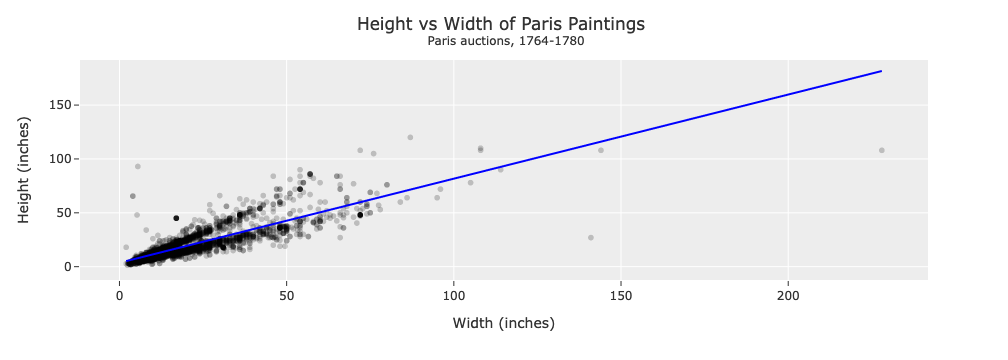

In [950]:
fig = px.scatter(DF,
                 x='Width_in',
                 y="Height_in",
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Height vs Width of Paris Paintings <br><sup> Paris auctions, 1764-1780</sup>',
                  title_x=0.5,
                  xaxis_title="Width (inches)",
                  yaxis_title="Height (inches)")

# Add the line our model would predict
DF_model = pd.DataFrame()
DF_model['w'] = DF['Width_in']
DF_model['y'] = LM.coef_*DF_model['w']+LM.intercept_
DF_model = DF_model.sort_values('w')

fig.add_trace(
    px.line(DF_model, x='w', y='y',color_discrete_sequence=['blue']).data[0]
)

fig.show()

**Check accuracy**

If the answer is less than 0 than there isn't a good linear relationship between the two variables. If the answer is between 0 and 1 than the outcome is pretty good (most realistic). If the answer is 1 than the answer is perfect and the linear function is perfect. 

In [956]:
LM.score(X, y)

0.6829467672722757

**Exercise 2** Redo the Linear Regression from the lecture to see if you can use the size ('Surface') of the painting to predict the price.

1. Create a data frame with only the price and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = Surface Area and gives as an output y=price

           X = DF_model['Surface'].values.reshape(-1,1)
           y = DF_model['price'].values
7. Plot a scatter plot of Price vs Surface add in your predicted line
8. Find your slope and intercept
9. Look at the score

Interpret your results. Should you use a linear model to predict the price of a painting using the surface area?

*In the lecture you can see the scatter plot and score that I got.*


### Preprocessing the Data

Before you can build a model you need to do some cleaning and preprocessing of your data. Here are some important steps:

1. Select the variables that you wan to use (columns)
2. Decide what to do about NaNs or other strange data
3. (*advanced*) Think about rescaling and standardizing
4. Create the inputs and outputs (sometimes encode)
5. (*advanced*) Test - Train split

### Train the model

1. Create the base model, in this case LinearRegression()
2. Train the model using the training data
3. Look at the results.


**Exercise 2** part 1 and 2

In [1032]:
DF_exercise_2 = DF[['Surface','price']]
DF_exercise_2.dtypes

Surface     object
price      float64
dtype: object

**Exercise 2** part 3

In [1034]:
DF_exercise_2['Surface'] = DF['Surface'].apply(lambda x: float(x))
DF_exercise_2.dtypes

Surface    float64
price      float64
dtype: object

In [1036]:
# How many Nans
print('Number of NaNs:')
print(DF_exercise_2.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_exercise_2.isna().sum().sum()/len(DF))
print('----------------------')

# drop them
DF_exercise_2.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_exercise_2.isna().sum().sum())
print('----------------------')

Number of NaNs:
176
----------------------
Percent NaNs:
0.051871500147362214
----------------------
Number of NaNs after drop:
0
----------------------


**Exercise 2** part 4

In [1038]:
X = DF_exercise_2['Surface'].values.reshape(-1,1)
y = DF_exercise_2['price'].values

In [1040]:
# Create linear regression object - a random straight line
LM = LinearRegression()
# Train the model using the data
LM.fit(X, y)

LinearRegression()

**Exercise 2** part 6

In [1042]:
# The coefficient is the slope
LM.coef_

array([0.1876263])

In [1044]:
LM.intercept_

660.1215276728371

**Exercise 2** part 5

The scatterplot didn't run and I couldn't figure out why. I noticed that my data frame, "DF_exercise_2", got overran but I followed the previous graph code perfectly so I don't know what went wrong. 

In [1046]:
fig = px.scatter(DF,
                x='Surface',
                 y='price',
                 color_discrete_sequence=['black'],
                 opacity=0.2)

fig.update_layout(template="ggplot2",
                  title='Price as a Function of Surface Area',
                  title_x=0.5,
                  xaxis_title='Surface',
                  yaxis_title='Price')

# Add the line our model would predict

DF_exercise_2 = pd.DataFrame()
DF_exercise_2['s'] = DF['Surface']
DF_exercise_2['y'] = LM.coef_*DF_exercise_2['s']+LM.intercept_
DF_exercise_2 = DF_exercise_2.sort_values('s')

fig.add_trace(
    px.line(DF_exercise_2, x='s', y='y',color_discrete_sequence=['blue']).data[0])

fig.show()

ValueError: ((3393,), (1,))

**Exercise 2** part 7

In [1048]:
LM.score(X, y)

0.011141075251450694

**Interpretation of Results**

The scatterplot doesn't prove to any a linear function. In fact, most of the plots are grouped together on the left-bottom edge of the graph. Basically, there appears to be no relationship between the price of a painting and its surface level. So, you should not use a linear model to predict the price of a painting using the surface area. This is clearly true because the Linear Regression score was 0.0, and when the score is 0 there isn't a linear relationship between the two variables. 

**Exercise 3** Redo the analysis for Linear Regression with more than one categorical value (from the lecture) except this time see if the school of the painting effects the overall size ('Surface') of the painting. Don't forget to drop the NaNs where we don't know the surface size and change the surface variables to floats.

1. Create a data frame with only the school and surface columns
2. Look at the data types
3. Preprocess the data - remove NaNs and change the Surface values to floats.
5. Train a linear regression model that takes as an input X = School and gives as an output y= surface area, now you need to one hot encode the X values!

           X = DF_model['school_pntg'].values.reshape(-1,1)
           y = DF_model['Surface'].values
   
9. Look at the output, what does it mean?
        - Which school of paintings on average are largest? smallest?

*You can see the outputs of my code in the lecture*


**Exercise 3** part 1

In [1050]:
my_cols = ['school_pntg','Surface']
DF_exercise_3 = DF[my_cols]
DF_exercise_3

,school_pntg,Surface
0,F,1091.5
1,I,252
2,D/FL,208
3,F,252
4,F,252
...,...,...
3388,F,387
3389,F,214.5
3390,F,720
3391,F,621


**Exercise 3** part 2

In [1052]:
DF_exercise_3.dtypes

school_pntg    object
Surface        object
dtype: object

In [1068]:
DF_exercise_3['school_pntg'].value_counts()

school_pntg
D/FL    1463
F       1294
I        406
X         40
S          7
G          5
A          2
Name: count, dtype: int64

**Exercise 3** part 3

In [1070]:
print('Number of NaNs:')
print(DF_exercise_3.isna().sum().sum())
print('----------------------')

# What percent of the data is this?
print('Percent NaNs:')
print(DF_exercise_3.isna().sum().sum()/len(DF))
print('----------------------')

# drop them
DF_exercise_3.dropna(inplace=True)
print('Number of NaNs after drop:')
print(DF_exercise_3.isna().sum().sum())
print('----------------------')

Number of NaNs:
0
----------------------
Percent NaNs:
0.0
----------------------
Number of NaNs after drop:
0
----------------------


In [1058]:
DF_exercise_3['Surface'] = DF['Surface'].apply(lambda x: float(x))
DF_exercise_3.dtypes

school_pntg     object
Surface        float64
dtype: object

**Exercise 3** part 4

In [1060]:
# Get the data we want to predict
X = DF_exercise_3['school_pntg'].values.reshape(-1,1)
y = DF_exercise_3['Surface'].values

# Now because X has lots of categories, we need to encode it:
encoder = OneHotEncoder()
X = encoder.fit_transform(X)

In [1062]:
cats = encoder.categories_[0]
cats

array(['A', 'D/FL', 'F', 'G', 'I', 'S', 'X'], dtype=object)

In [1064]:
# Look at each category and encoding
result = DF_exercise_3.groupby('school_pntg',as_index=False).first()
encoded_data = encoder.transform(result['school_pntg'].values.reshape(-1,1))



for i,e in enumerate(encoded_data.toarray()):
    print(cats[i])
    print(e)
    print('---------------------------')

A
[1. 0. 0. 0. 0. 0. 0.]
---------------------------
D/FL
[0. 1. 0. 0. 0. 0. 0.]
---------------------------
F
[0. 0. 1. 0. 0. 0. 0.]
---------------------------
G
[0. 0. 0. 1. 0. 0. 0.]
---------------------------
I
[0. 0. 0. 0. 1. 0. 0.]
---------------------------
S
[0. 0. 0. 0. 0. 1. 0.]
---------------------------
X
[0. 0. 0. 0. 0. 0. 1.]
---------------------------


**Exercise 3** part 5

In [1066]:
# Create linear regression object - a random straight line
LM = LinearRegression()

# Train the model using the data
LM.fit(X, y)


# Look at the information we get
print(cats)
print('------------------------------')
print(LM.coef_)
print('------------------------------')
print(LM.intercept_)

['A' 'D/FL' 'F' 'G' 'I' 'S' 'X']
------------------------------
[-392.07405544 -266.70347449  122.28771743 -393.21155591  142.65081971
 1051.64022987 -264.58968117]
------------------------------
686.0740419935794


This means that the average surface for all of the paintings was 686.07. But, since the painting schools and coefficients are in the same categorical order, if a painting is from a school in Austria than it would averagely take up 392.07 less surface space. A Dutch/Flemish painting would averagely take up 266.70 less surface space. A painting from a painting school in France would averagely take up 122.28 more surface space. A German painting would averagely take up 393.21 less surface space. An Italian painting would take up 142.65 more surface space. A painting from a painting school in Spain would take up 1051.64 more surface space. And a painting from an unknown painting school would averagely take up 264.59 less surface space. 


**On average, the largest school of painting is Spain at an increase of 1051.64 on the average surface.**


**On average, the smallest school of paintintg is Germany with a decrease on the average surface of 393.21.**